In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
netflix = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


1. How many total records are in the dataset?

In [3]:
total_records = pd.DataFrame([netflix.shape], columns = ("Movie or Show", "Characteristic"))
total_records
# 8807 - rows (Movie or Show)
# 12 - columns (Characteristic of movies / shows: country, director, title, e.t.c)

,Movie or Show,Characteristic
0,8807,12


2. What are the types of content (Movies / TV Shows) and how are they distributed?

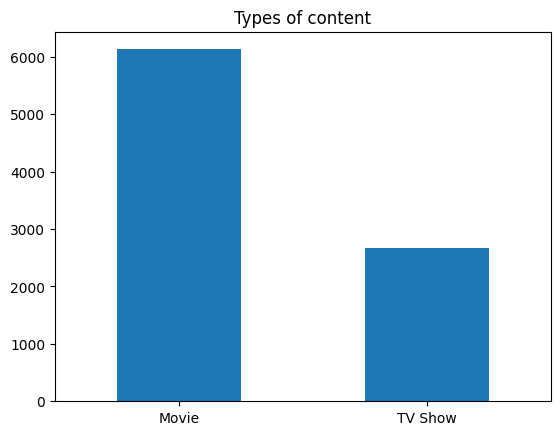

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [4]:
types_of_content = netflix.type.value_counts()

types_of_content.plot(kind = "bar", title = "Types of content")
plt.xlabel("")
plt.xticks(rotation = 0)
plt.show()

types_of_content

# In DataSet 6131 Movies and 2676 TV Shows

3. How many unique countries are in the dataset?

In [54]:
countries = netflix["country"].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
flat = [country for sublist in countries for country in sublist]
print(len(set(flat)))

# 123 Unique countries where movies and TV_Shows

123


4. What was the most “productive” year for Netflix?

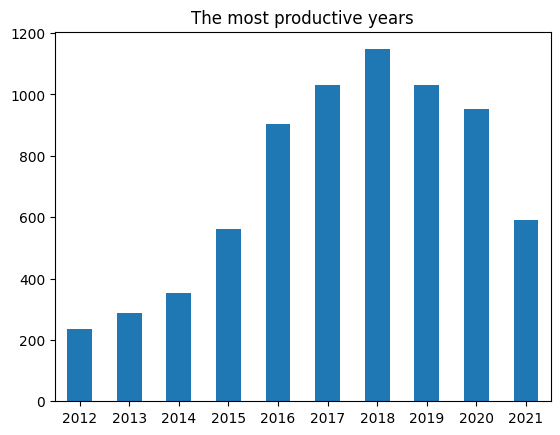

In [6]:
most_productive_years = netflix["release_year"].value_counts().sort_values(ascending = False).head(10).sort_index()

# The most productive year was 2018

most_productive_years.plot(kind = "bar", title = "The most productive years")
plt.xticks(rotation = 0)
plt.xlabel("")
plt.show()

5. What genres are most popular on Netflix?

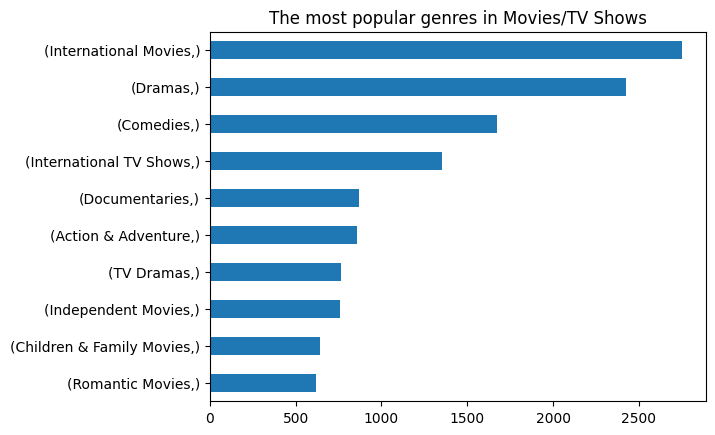

In [30]:
netflix
genre = netflix['listed_in'].apply(lambda x: [i.strip() for i in x.split(",")])
flat = [gen for sublist in genre for gen in sublist]
popular_genres = pd.DataFrame(flat).value_counts().head(10).sort_values()

popular_genres.plot(kind = "barh", title = "The most popular genres in Movies/TV Shows")
plt.xlabel("")
plt.ylabel("")
plt.show()

# The most popular genres its IM, Dramas and Comedies

6. **What ratings are most commonly used?**

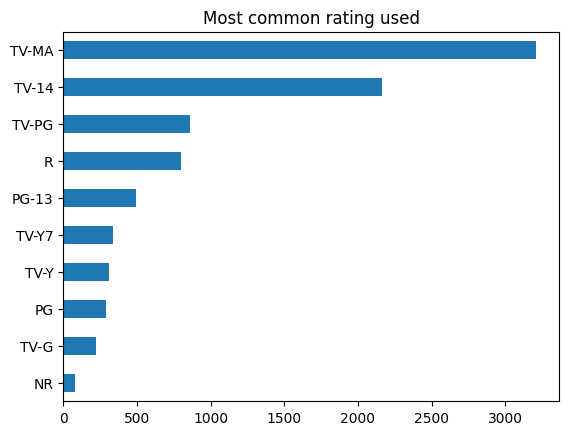

In [50]:
common_ratings = netflix["rating"].dropna().value_counts().head(10).sort_values(ascending = False)

common_ratings.sort_values().plot(kind = "barh", title = "Most common rating used")
plt.ylabel("")
plt.show()

7. What is the oldest and newest release year?

In [63]:
oldest_movie = netflix["release_year"].min()
newest_movie = netflix["release_year"].max()

print(f"Oldest movie: {oldest_movie}. \nNewest movie: {newest_movie}.")

Oldest movie: 1925. 
Newest movie: 2021.


8. Which director is the most productive?

In [69]:
most_productive_director = netflix["director"].dropna().value_counts().head(1)
most_productive_director

director
Rajiv Chilaka    19
Name: count, dtype: int64